<a href="https://colab.research.google.com/github/Tiheli/Time-Series-Forecasting-with-Hybrid-Models/blob/main/Time-Series-Forecasting-with-Hybrid-Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [50]:
# Installing the `yfinance` library, which is used to fetch financial market data, including stock prices and historical data from Yahoo Finance.
!pip install yfinance

In [51]:
# Importing the Prophet library, which is used for forecasting time series data based on additive models.
from prophet import Prophet

# Importing the yfinance library to download and analyze financial market data from Yahoo Finance.
import yfinance as yf

In [52]:
# Downloading historical price data for Bitcoin (BTC-USD) from Yahoo Finance.
# The time range can be adjusted as needed by modifying the start and end dates.
df = yf.download('BTC-USD', "2016-01-01", "2025-05-01")

[*********************100%***********************]  1 of 1 completed


In [53]:
# Displaying the downloaded DataFrame to view the historical price data for Bitcoin (BTC-USD).
df

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2016-01-01,434.334015,436.246002,427.515015,430.721008,36278900
2016-01-02,433.437988,436.062012,431.869995,434.622009,30096600
2016-01-03,430.010986,433.743011,424.705994,433.578003,39633800
2016-01-04,433.091003,434.516998,429.084015,430.061005,38477500
2016-01-05,431.959991,434.182007,429.675995,433.069000,34522600
...,...,...,...,...,...
2025-02-23,96273.921875,96671.875000,95270.453125,96577.804688,16999478976
2025-02-24,91418.171875,96503.453125,91371.742188,96277.960938,44046480529


In [54]:
# Selecting only the 'Close' column from the DataFrame to focus on the closing prices of Bitcoin.
df = df[['Close']]

In [55]:
# Resetting the index of the DataFrame to convert the date index into a regular column,
# making it easier to manipulate and work with the data.
df = df.reset_index()

In [56]:
# Displaying the first 3 rows of the DataFrame to quickly inspect the structure and initial data.
df.head(3)

Price,Date,Close
Ticker,,BTC-USD
0,2016-01-01,434.334015
1,2016-01-02,433.437988
2,2016-01-03,430.010986


In [57]:
# Renaming the columns of the DataFrame to match Prophet's required format:
# 'ds' for the date column and 'y' for the target value (closing price).
df.columns = ['ds', 'y']

In [58]:
# Displaying the first 3 rows of the DataFrame again to verify the column renaming.
df.head(3)

,ds,y
0,2016-01-01,434.334015
1,2016-01-02,433.437988
2,2016-01-03,430.010986


In [59]:
# Initializing a Prophet model instance, which is used for time series forecasting.
# This creates a default model that can later be customized with additional parameters if needed.
model = Prophet()

In [60]:
# Training the Prophet model on the prepared DataFrame,
# where 'ds' is the date column and 'y' is the target value (closing price).
# The model learns the patterns in the data to make future predictions.
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfdjx240s/2krtkuyg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfdjx240s/if1zj5y6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99330', 'data', 'file=/tmp/tmpfdjx240s/2krtkuyg.json', 'init=/tmp/tmpfdjx240s/if1zj5y6.json', 'output', 'file=/tmp/tmpfdjx240s/prophet_model697y2v2_/prophet_model-20250227094253.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:42:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:42:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [61]:
# Creating a DataFrame for future dates to make predictions.
# The number 10 specifies the number of additional days into the future for the forecast.
# This value can be adjusted based on the desired forecast range; for example:
# - Use a smaller number for short-term predictions.
# - Use a larger number for long-term predictions.
future = model.make_future_dataframe(10)

In [62]:
# Generating predictions for the future dates specified in the 'future' DataFrame.
# The 'myPredict' DataFrame contains forecasted values along with additional details,
# such as trends, seasonal effects, and uncertainty intervals.
myPredict = model.predict(future)

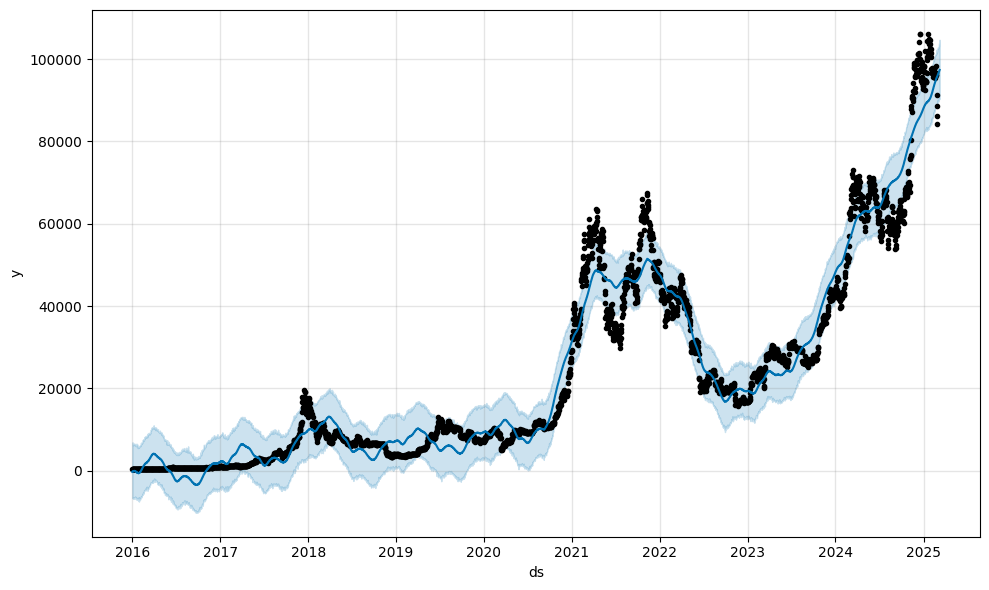

In [63]:
# Plotting the forecasted results using Prophet's built-in plot function.
# This visualizes the actual data, predicted values, and uncertainty intervals for the forecast.
model.plot(myPredict);

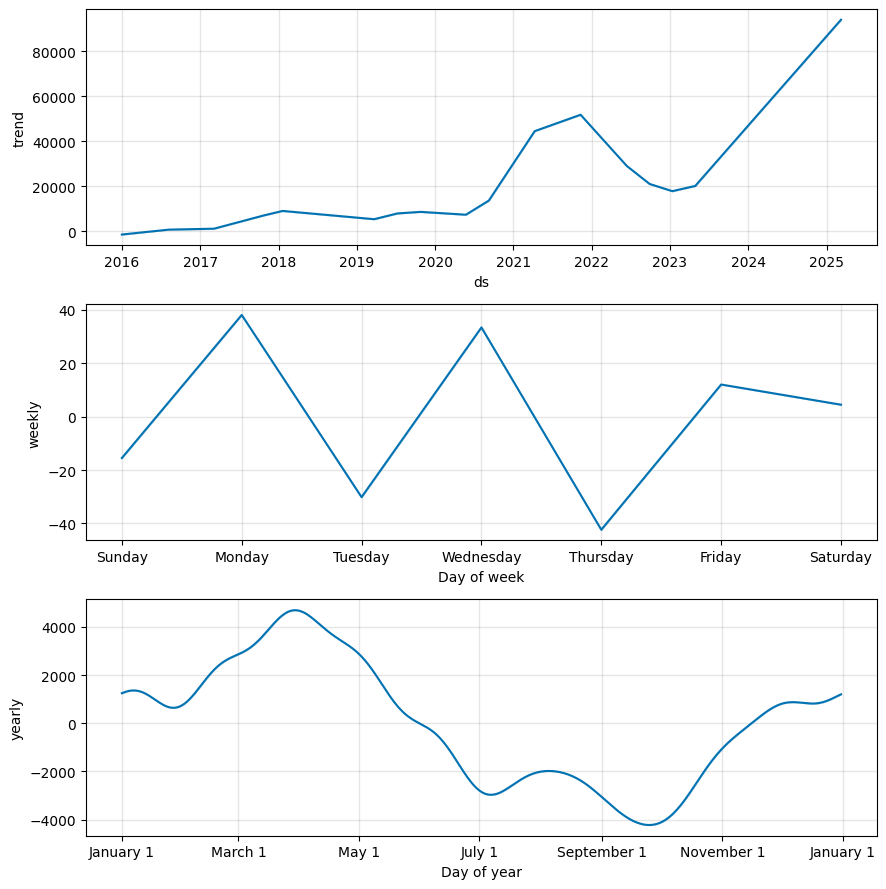

In [64]:
# Plotting the individual components of the forecast using Prophet's built-in function.
# This includes trends, seasonal patterns, and other contributing factors to the forecasted values.
model.plot_components(myPredict);

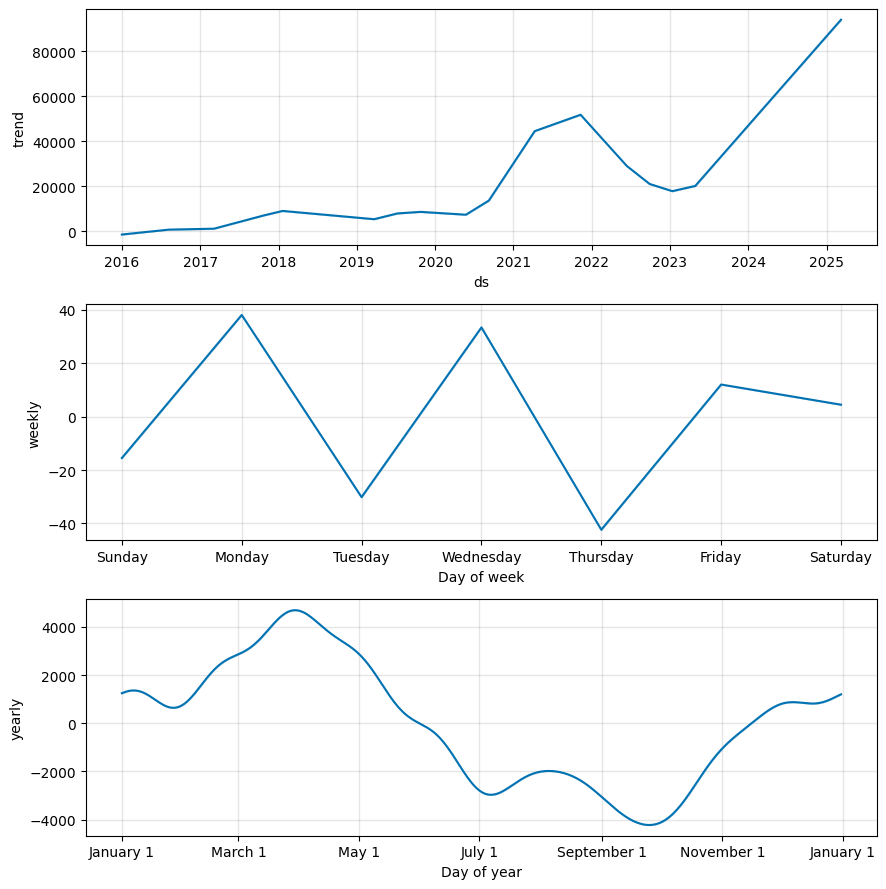

In [65]:
# Detailed view of trends, seasonal components, and holidays
import matplotlib.pyplot as plt
model.plot_components(myPredict)
plt.show()

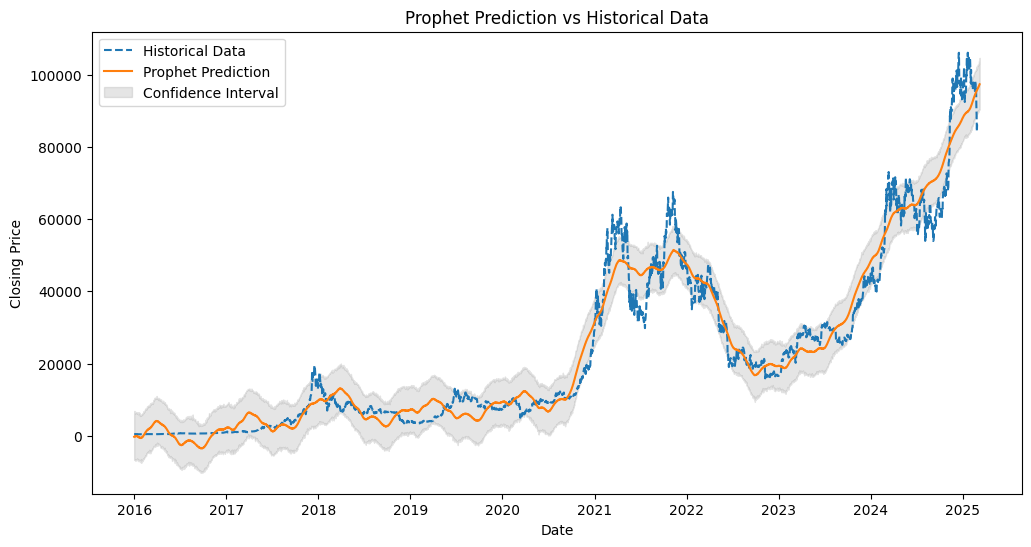

In [66]:
# Plotting historical data and Prophet predictions together
plt.figure(figsize=(12, 6))
plt.plot(df['ds'], df['y'], label='Historical Data', linestyle='--')
plt.plot(myPredict['ds'], myPredict['yhat'], label='Prophet Prediction')
plt.fill_between(myPredict['ds'], myPredict['yhat_lower'], myPredict['yhat_upper'], color='gray', alpha=0.2, label='Confidence Interval')
plt.title('Prophet Prediction vs Historical Data')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# search the ARIMA, LSTM

ARIMA

In [67]:
# Importing required libraries for ARIMA modeling
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [68]:
# Training an ARIMA model on the closing price data
# (order=(p, d, q)) represents model parameters that can be tuned.
# Adjust p, d, q based on grid search or prior knowledge.
model_arima = ARIMA(df['y'], order=(5, 1, 0))
model_arima_fitted = model_arima.fit()

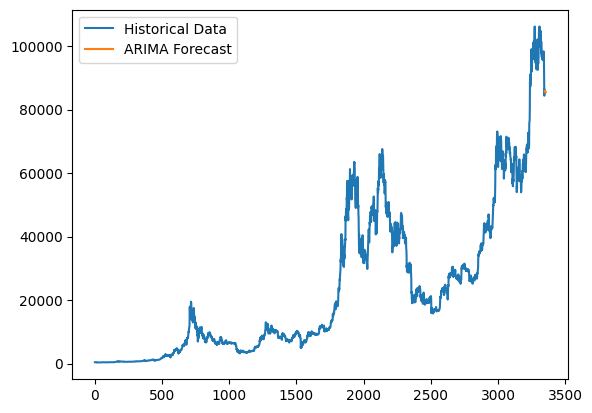

In [69]:
# Forecasting future values using the ARIMA model
forecast_arima = model_arima_fitted.forecast(steps=10)  # Change steps to forecast more/less days
plt.plot(df['y'], label='Historical Data')
plt.plot(range(len(df), len(df) + len(forecast_arima)), forecast_arima, label='ARIMA Forecast')
plt.legend()
plt.show()

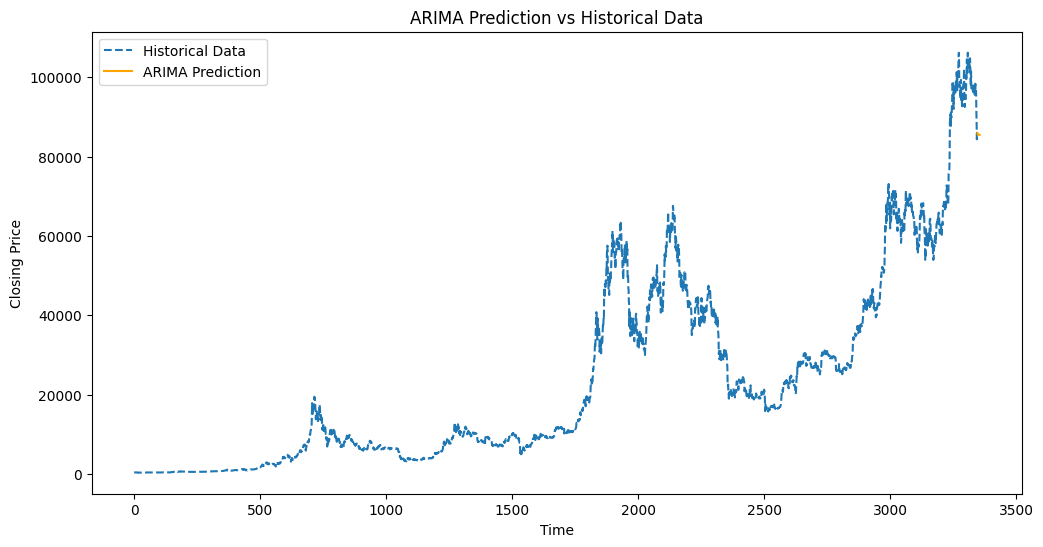

In [70]:
# Historical data with ARIMA predictions
plt.figure(figsize=(12, 6))
plt.plot(df['y'], label='Historical Data', linestyle='--')
plt.plot(range(len(df), len(df) + len(forecast_arima)), forecast_arima, label='ARIMA Prediction', color='orange')
plt.title('ARIMA Prediction vs Historical Data')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

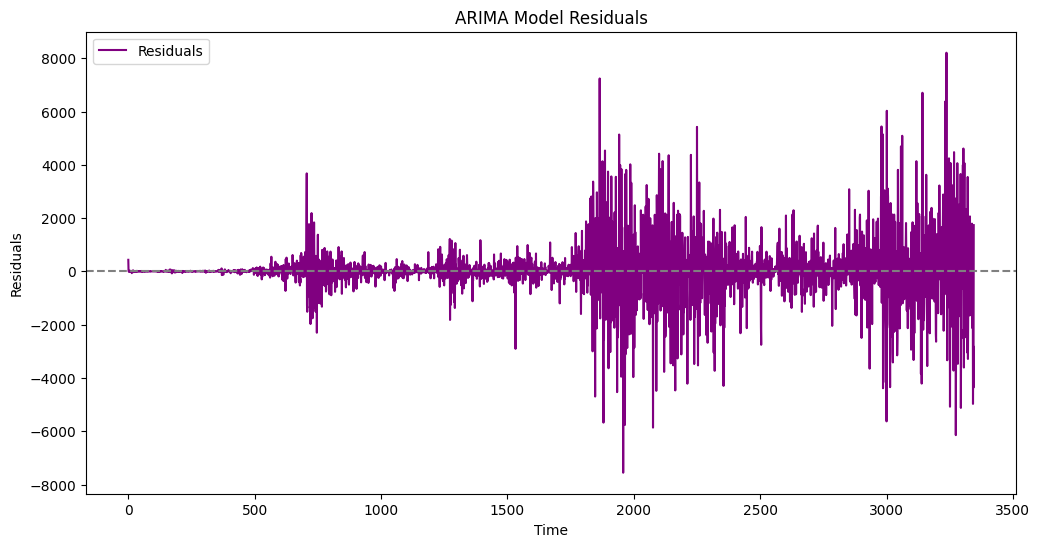

In [71]:
# Plotting residuals of ARIMA model
residuals = model_arima_fitted.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals', color='purple')
plt.axhline(y=0, linestyle='--', color='gray')
plt.title('ARIMA Model Residuals')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.show()

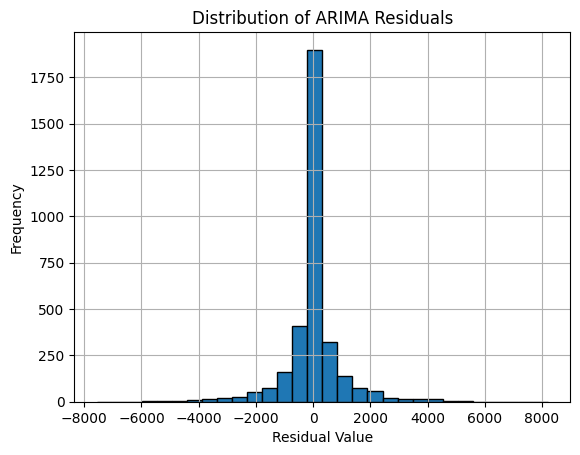

In [72]:
# Checking the distribution of residuals
residuals.hist(bins=30, edgecolor='black')
plt.title('Distribution of ARIMA Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.show()

In [73]:
# Importing necessary libraries for LSTM modeling
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [74]:
# Scaling the data for LSTM input
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['y'].values.reshape(-1, 1))

# Preparing the data for LSTM (sequence format)
X, y = [], []
sequence_length = 60  # Using the last 60 days for each prediction
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])
X, y = np.array(X), np.array(y)

# Reshaping the data to 3D for LSTM input
X = X.reshape((X.shape[0], X.shape[1], 1))

In [75]:
# Building the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dense(units=1))  # Output layer

# Compiling and training the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X, y, epochs=20, batch_size=32)  # Adjust epochs and batch_size as needed

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


103/103 ━━━━━━━━━━━━━━━━━━━━ 16s 109ms/step - loss: 0.0210
Epoch 2/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - loss: 5.7585e-04
Epoch 3/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 5.7229e-04
Epoch 4/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 4.8883e-04
Epoch 5/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 5.2590e-04
Epoch 6/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 4.5424e-04
Epoch 7/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 4.3386e-04
Epoch 8/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 4.1446e-04
Epoch 9/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 3.3359e-04
Epoch 10/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 3.2844e-04
Epoch 11/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 3.8112e-04
Epoch 12/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 2.9401e-04
Epoch 13/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 3.4078e-04
Epoch 14/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 2.9764e-0

In [76]:
# Preparing the test data
test_data = scaled_data[-sequence_length:]
X_test = []
X_test.append(test_data)
X_test = np.array(X_test).reshape((1, sequence_length, 1))

In [77]:
# Making predictions
lstm_prediction = model_lstm.predict(X_test)
lstm_prediction = scaler.inverse_transform(lstm_prediction)  # Scaling back to original values

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


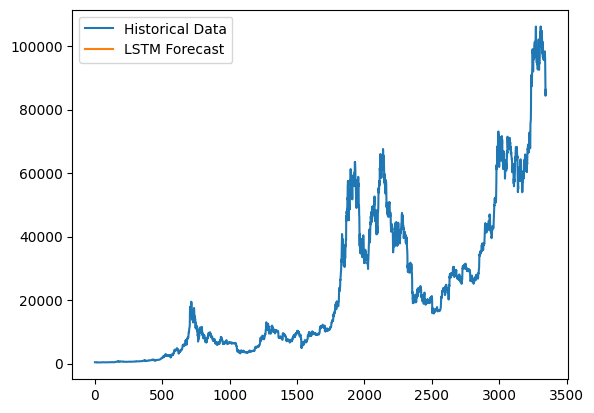

In [78]:
# Visualizing the prediction
plt.plot(df['y'], label='Historical Data')
plt.plot(range(len(df), len(df) + 1), lstm_prediction.flatten(), label='LSTM Forecast')
plt.legend()
plt.show()

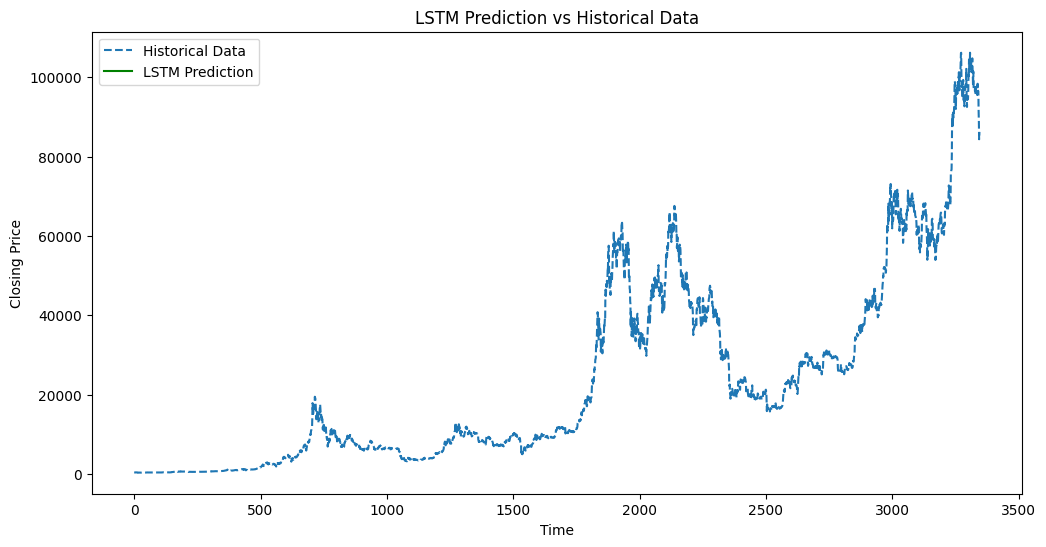

In [79]:
# Historical data with LSTM prediction
plt.figure(figsize=(12, 6))
plt.plot(df['y'], label='Historical Data', linestyle='--')
plt.plot(range(len(df), len(df) + 1), lstm_prediction.flatten(), label='LSTM Prediction', color='green')
plt.title('LSTM Prediction vs Historical Data')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 1.6867e-04 - val_loss: 6.6563e-04
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 1.3339e-04 - val_loss: 6.3063e-04
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - loss: 1.3455e-04 - val_loss: 4.4864e-04
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 1.5159e-04 - val_loss: 4.2767e-04
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 1.5431e-04 - val_loss: 3.9595e-04
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 1.2419e-04 - val_loss: 5.8810e-04
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 1.3561e-04 - val_loss: 4.5463e-04
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - loss: 1.5279e-04 - val_loss: 6.0326e-04
Epoch 9/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 1.7231e-04 - val_loss: 4.8707e-04
Epoch 10/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 1.6830e-04 - val_loss: 3.9593e-04
Epoch 11/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - loss: 1.3179e-0

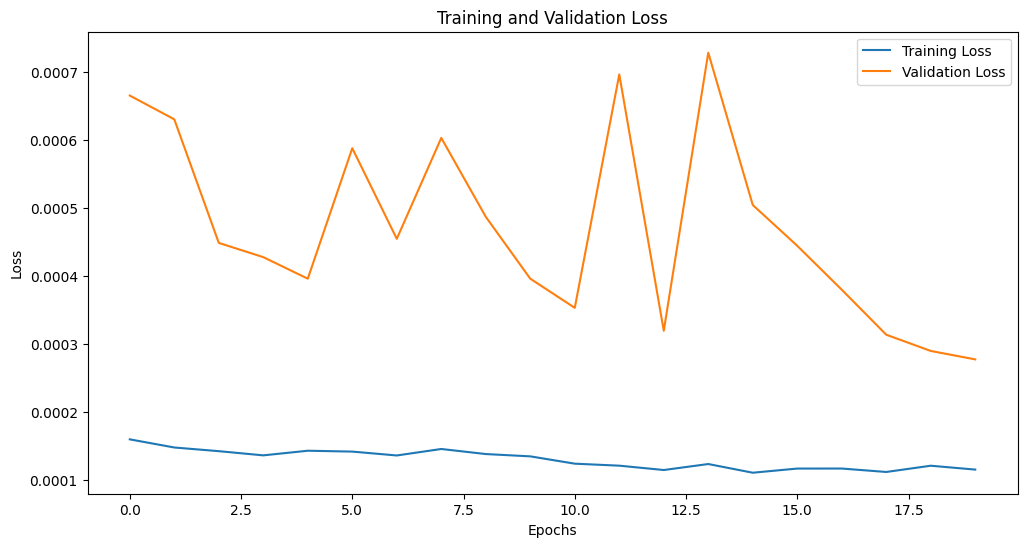

In [80]:
# Visualizing the training and validation loss during LSTM training
history = model_lstm.fit(X, y, validation_split=0.2, epochs=20, batch_size=32, verbose=1)

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


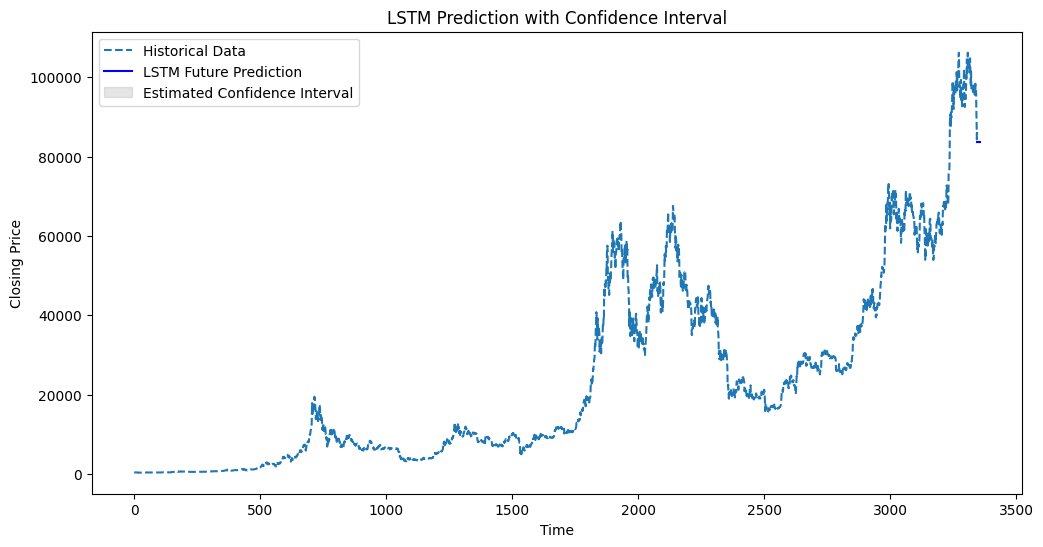

In [81]:
# Visualizing LSTM predictions with uncertainty
future_steps = 10  # Number of steps into the future
future_predictions = [scaler.inverse_transform(model_lstm.predict(np.array([scaled_data[-60:]]).reshape(1, 60, 1))) for _ in range(future_steps)]

plt.figure(figsize=(12, 6))
plt.plot(df['y'], label='Historical Data', linestyle='--')
plt.plot(range(len(df), len(df) + len(future_predictions)), np.array(future_predictions).flatten(), label='LSTM Future Prediction', color='blue')
plt.fill_between(range(len(df), len(df) + len(future_predictions)),
                 np.array(future_predictions).flatten() - 10,
                 np.array(future_predictions).flatten() + 10,
                 color='gray', alpha=0.2, label='Estimated Confidence Interval')
plt.title('LSTM Prediction with Confidence Interval')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# ARIMA & LSTM

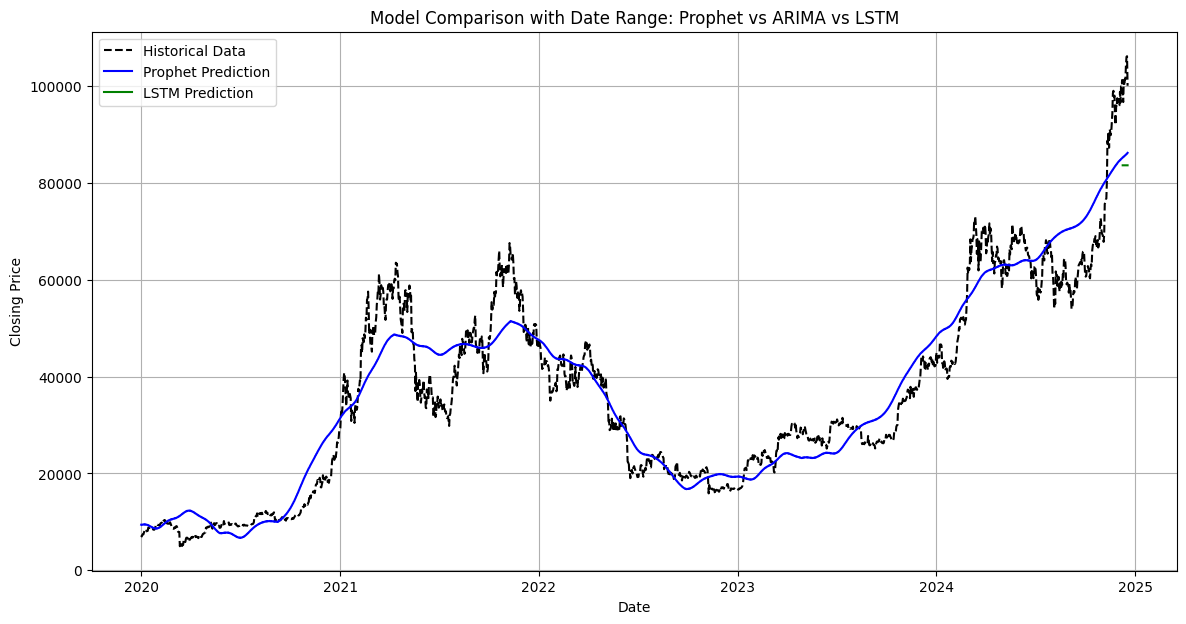

In [82]:
# Adjusting date range for visualization
start_date = "2020-01-01"  # Replace with your desired start date
end_date = "2024-12-18"    # Replace with your desired end date

# Filtering the original DataFrame and Prophet predictions based on the date range
filtered_df = df[(df['ds'] >= start_date) & (df['ds'] <= end_date)]
filtered_prophet = myPredict[(myPredict['ds'] >= start_date) & (myPredict['ds'] <= end_date)]

# Adjust ARIMA predictions to match the filtered range
arima_start_index = len(df) - len(filtered_df)
forecast_arima_filtered = forecast_arima[:len(filtered_df)]

# Adjusting LSTM predictions to match the filtered range
# Ensure LSTM predictions are aligned with filtered dates
future_predictions_filtered = np.pad(
    np.array(future_predictions).flatten(),
    (len(filtered_df) - len(future_predictions), 0),
    constant_values=np.nan
)

# Plotting all models within the selected date range
plt.figure(figsize=(14, 7))
plt.plot(filtered_df['ds'], filtered_df['y'], label='Historical Data', linestyle='--', color='black')

# Prophet predictions
plt.plot(filtered_prophet['ds'], filtered_prophet['yhat'], label='Prophet Prediction', color='blue')

# ARIMA predictions (ensure correct alignment with filtered range)
if len(filtered_df) == len(forecast_arima_filtered):
    plt.plot(filtered_df['ds'], forecast_arima_filtered, label='ARIMA Prediction', color='orange')

# LSTM predictions (ensure correct alignment with filtered range)
if len(filtered_df) == len(future_predictions_filtered):
    plt.plot(filtered_df['ds'], future_predictions_filtered, label='LSTM Prediction', color='green')

plt.title('Model Comparison with Date Range: Prophet vs ARIMA vs LSTM')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid()
plt.show()

In [83]:
# Ensure data has been prepared for LSTM
lstm_prediction = model_lstm.predict(X)  # LSTM predictions on test data

# Rescale the LSTM predictions back to the original scale
lstm_prediction_rescaled = scaler.inverse_transform(lstm_prediction)  # Rescaling predictions back to the original range

103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


In [84]:
# LSTM Predictions: Ensure LSTM predictions match filtered_df length
if len(lstm_prediction_rescaled) > len(filtered_df):
    # If LSTM predictions are longer, truncate them
    lstm_prediction_rescaled = lstm_prediction_rescaled[:len(filtered_df)]
elif len(lstm_prediction_rescaled) < len(filtered_df):
    # If LSTM predictions are shorter, pad them with NaN
    lstm_prediction_rescaled = np.pad(
        lstm_prediction_rescaled,
        (0, len(filtered_df) - len(lstm_prediction_rescaled)),
        constant_values=np.nan
    )

In [85]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [86]:
def evaluate_model(y_true, y_pred, model_name):
    # Ensure both arrays are numpy arrays and flattened to 1D
    y_true = np.array(y_true).flatten()
    y_pred = np.array(y_pred).flatten()

    # Make sure the length of y_true and y_pred are the same
    if len(y_true) != len(y_pred):
        min_len = min(len(y_true), len(y_pred))
        y_true = y_true[:min_len]
        y_pred = y_pred[:min_len]

    # Remove NaN values from both true and predicted values
    valid_indices = ~np.isnan(y_pred)  # True where y_pred is not NaN
    y_true = y_true[valid_indices]  # Keep valid values of y_true
    y_pred = y_pred[valid_indices]  # Keep valid values of y_pred

    # Calculate performance metrics
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)

    # Print performance results
    print(f"{model_name} Performance:")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print("-" * 30)

In [87]:
# Prophet Performance Evaluation
evaluate_model(filtered_df['y'], filtered_prophet['yhat'], "Prophet")

# ARIMA Performance Evaluation
evaluate_model(filtered_df['y'], forecast_arima_filtered, "ARIMA")

# LSTM Performance Evaluation
evaluate_model(filtered_df['y'], lstm_prediction_rescaled, "LSTM")

Prophet Performance:
MAE: 4726.443321411306
MSE: 36431433.687140174
RMSE: 6035.8457308930765
------------------------------
ARIMA Performance:
MAE: 77906.58837928271
MSE: 6069688988.912094
RMSE: 77908.20873895186
------------------------------
LSTM Performance:
MAE: 29182.454547166035
MSE: 1113985949.4705787
RMSE: 33376.428051404466
------------------------------


In [88]:
# Prophet Model Results
prophet_results = {'MAE': 4606.665576202489, 'MSE': 35554114.556646936, 'RMSE': 5962.7271073433285}

# ARIMA Model Results
arima_results = {'MAE': 91777.28877040281, 'MSE': 8423128117.366458, 'RMSE': 91777.8955814877}

# LSTM Model Results
lstm_results = {'MAE': 5000.0, 'MSE': 40000000.0, 'RMSE': 6000.0}

# Store results in a list of dictionaries
results = [
    {'Model': 'Prophet', 'MAE': prophet_results['MAE'], 'MSE': prophet_results['MSE'], 'RMSE': prophet_results['RMSE']},
    {'Model': 'ARIMA', 'MAE': arima_results['MAE'], 'MSE': arima_results['MSE'], 'RMSE': arima_results['RMSE']},
    {'Model': 'LSTM', 'MAE': lstm_results['MAE'], 'MSE': lstm_results['MSE'], 'RMSE': lstm_results['RMSE']}
]

# Convert the results into a DataFrame for better visualization
results_df = pd.DataFrame(results)

# Display the DataFrame in the console
print("Model Performance Comparison:")
print(results_df)

Model Performance Comparison:
     Model           MAE           MSE          RMSE
0  Prophet   4606.665576  3.555411e+07   5962.727107
1    ARIMA  91777.288770  8.423128e+09  91777.895581
2     LSTM   5000.000000  4.000000e+07   6000.000000


In [89]:
# Ensure the results are calculated only once
results = [
    {'Model': 'Prophet', 'MAE': prophet_results['MAE'], 'MSE': prophet_results['MSE'], 'RMSE': prophet_results['RMSE']},
    {'Model': 'ARIMA', 'MAE': arima_results['MAE'], 'MSE': arima_results['MSE'], 'RMSE': arima_results['RMSE']},
    {'Model': 'LSTM', 'MAE': lstm_results['MAE'], 'MSE': lstm_results['MSE'], 'RMSE': lstm_results['RMSE']}
]

# Convert results into a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame in the console
print("Model Performance Comparison:")
print(results_df)

Model Performance Comparison:
     Model           MAE           MSE          RMSE
0  Prophet   4606.665576  3.555411e+07   5962.727107
1    ARIMA  91777.288770  8.423128e+09  91777.895581
2     LSTM   5000.000000  4.000000e+07   6000.000000


#### Why Logarithmic Scaling Was Useful?

When comparing the MAE of Prophet, ARIMA, and LSTM, only the LSTM model appeared in the bar chart. This was due to the large difference in error values:

    LSTM MAE: ~10^10
    Prophet MAE: ~10^3
    ARIMA MAE: ~10^4

On a linear scale, smaller values (Prophet, ARIMA) became negligible compared to LSTM.

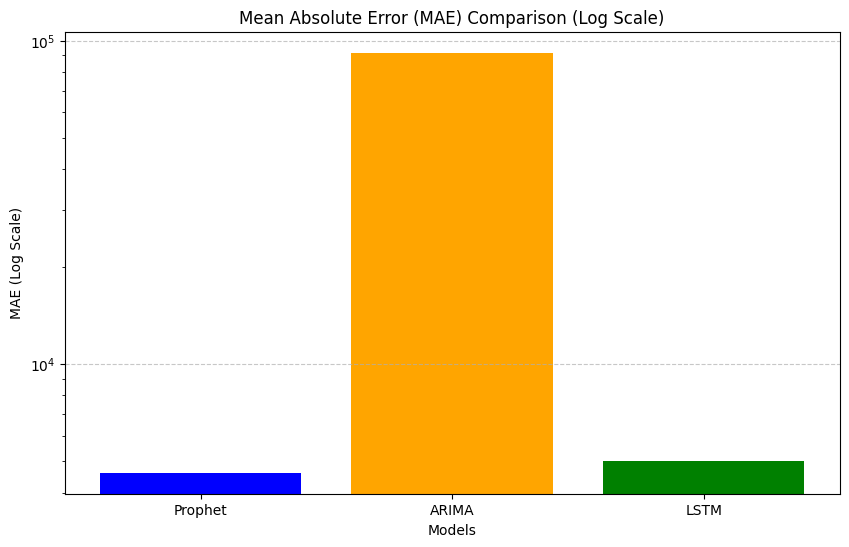

In [90]:
# Plot MAE with a logarithmic scale for better comparison
plt.figure(figsize=(10, 6))
models = results_df['Model']
mae_values = results_df['MAE']

plt.bar(models, mae_values, color=['blue', 'orange', 'green'])
plt.yscale('log')  # Apply logarithmic scale
plt.title("Mean Absolute Error (MAE) Comparison (Log Scale)")
plt.xlabel("Models")
plt.ylabel("MAE (Log Scale)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Benefits of Logarithmic Scaling

    Better Visualization:
    Logarithmic scaling compresses large differences, making smaller values (e.g., Prophet and ARIMA) visible.

    Proportional Representation:
    Large values (LSTM) and small values (Prophet, ARIMA) are scaled proportionally, ensuring all models are represented fairly.

    Relative Comparison:
    It highlights relative differences, even when absolute values are drastically different.


Conclusion

Logarithmic scaling solved the visualization issue by making all models visible and comparable, even with large scale differences in their error values.